In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
data = pd.read_csv("/content/MyDrive/MyDrive/allKfall.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ,Trial ID,Task ID,Subject,Description
0,-0.043,-0.729,-0.159,25.439335,0.401071,-0.802141,19.033665,-12.163898,51.995939,1,20,SA06,Forward fall when trying to sit down
1,-0.043,-0.719,-0.142,27.731167,0.171887,-1.718874,19.314414,-12.152439,51.978750,1,20,SA06,Forward fall when trying to sit down
2,-0.042,-0.709,-0.136,29.965703,2.750198,-2.005353,19.623811,-12.118062,51.967291,1,20,SA06,Forward fall when trying to sit down
3,-0.049,-0.711,-0.157,31.971056,2.750198,-0.974029,19.944668,-12.083684,51.967291,1,20,SA06,Forward fall when trying to sit down
4,-0.062,-0.726,-0.151,33.575339,2.005353,0.401071,20.282713,-12.060766,51.978750,1,20,SA06,Forward fall when trying to sit down
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173643,0.895,-3.884,1.057,200.019638,-69.671693,41.825934,124.853278,6.978628,-72.490646,5,34,SA38,Backward fall while walking caused by a slip
173644,-0.045,-3.997,1.733,173.434387,-47.269035,49.732754,126.543504,6.858307,-73.132359,5,34,SA38,Backward fall while walking caused by a slip
173645,-0.452,-3.324,1.912,123.930815,-25.324744,-38.159003,127.809741,7.316674,-73.075063,5,34,SA38,Backward fall while walking caused by a slip
173646,-0.637,-3.173,2.092,164.209763,-18.105473,-81.302740,129.528615,8.061519,-72.685452,5,34,SA38,Backward fall while walking caused by a slip


In [ ]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
print(data[data["EulerZ"].isnull()][null_columns])

Empty DataFrame
Columns: []
Index: []


In [ ]:
data.shape

(173648, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173648 entries, 0 to 173647
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   AccX         173648 non-null  float64
 1   AccY         173648 non-null  float64
 2   AccZ         173648 non-null  float64
 3   GyrX         173648 non-null  float64
 4   GyrY         173648 non-null  float64
 5   GyrZ         173648 non-null  float64
 6   EulerX       173648 non-null  float64
 7   EulerY       173648 non-null  float64
 8   EulerZ       173648 non-null  float64
 9   Trial ID     173648 non-null  int64  
 10  Task ID      173648 non-null  object 
 11  Subject      173648 non-null  object 
 12  Description  173648 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 17.2+ MB


In [ ]:
data.describe()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ,Trial ID
count,173648.000000,173648.000000,173648.000000,173648.000000,173648.000000,173648.000000,173648.000000,173648.000000,173648.000000,173648.000000
mean,0.040411,-0.520870,-0.242565,-24.546592,5.556247,-5.273795,61.334189,2.971362,-24.909230,3.045373
std,0.619111,0.756514,0.753905,106.738995,81.604594,52.041922,37.213884,17.842362,43.523803,1.438930
min,-3.999000,-3.999000,-3.996000,-946.984982,-693.107293,-608.424100,-179.983296,-89.278316,-179.994756,1.000000
25%,-0.095000,-0.827000,-0.460000,-72.135412,-26.356068,-20.855671,36.577639,-3.271590,-38.943955,2.000000
50%,0.016000,-0.597000,-0.174000,-21.485925,2.692903,-2.119945,63.237374,1.610012,-21.921373,3.000000
75%,0.137000,-0.237000,0.064000,27.287125,35.867171,11.516456,83.199231,7.712015,-9.728827,4.000000
max,3.996000,3.999000,3.999000,1719.905324,675.861257,508.844000,179.966108,89.066321,179.926001,7.000000


In [ ]:
data.isnull()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ,Trial ID,Task ID,Subject,Description
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173643,False,False,False,False,False,False,False,False,False,False,False,False,False
173644,False,False,False,False,False,False,False,False,False,False,False,False,False
173645,False,False,False,False,False,False,False,False,False,False,False,False,False
173646,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().values.any()

False

In [ ]:
data.isnull().any()

AccX           False
AccY           False
AccZ           False
GyrX           False
GyrY           False
GyrZ           False
EulerX         False
EulerY         False
EulerZ         False
Trial ID       False
Task ID        False
Subject        False
Description    False
dtype: bool

In [ ]:
data["Description"].unique()

array(['Forward fall when trying to sit down',
       'Backward fall when trying to sit down',
       'lateral fall when trying to sit down',
       'Forward fall when trying to get up',
       'lateral fall when trying to get up',
       'Forward fall while sitting, caused by fainting',
       'lateral fall while sitting, caused by fainting',
       'Backward fall while sitting, caused by fainting',
       'Vertical(forward) fall while walking caused by fainting',
       'Fall while walking, with use of hands in a table to dampen fall, caused by fainting',
       'Forward fall while walking caused by a trip',
       'Forward fall while jogging caused by a trip',
       'Forward fall while walking caused by a slip',
       'Forward lateral fall while walking caused by a slip',
       'Backward fall while walking caused by a slip'], dtype=object)

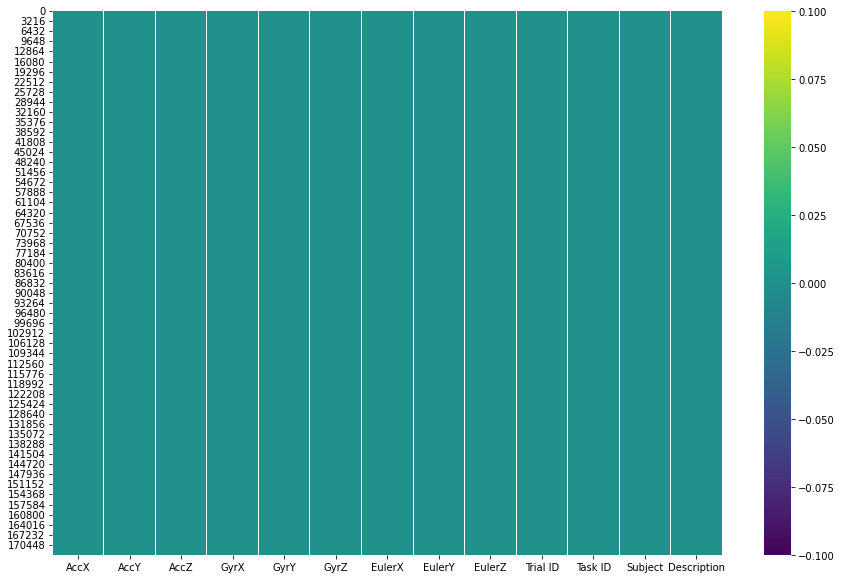

In [ ]:
 
sns.heatmap(data.isnull(), cmap='viridis')

In [ ]:
pd.crosstab(index = data["Description"],columns="count")

col_0,count
Description,
Backward fall when trying to sit down,7728
"Backward fall while sitting, caused by fainting",8262
Backward fall while walking caused by a slip,7586
"Fall while walking, with use of hands in a table to dampen fall, caused by fainting",8299
Forward fall when trying to get up,10034
Forward fall when trying to sit down,50030
Forward fall while jogging caused by a trip,7700
"Forward fall while sitting, caused by fainting",11603
Forward fall while walking caused by a slip,8002


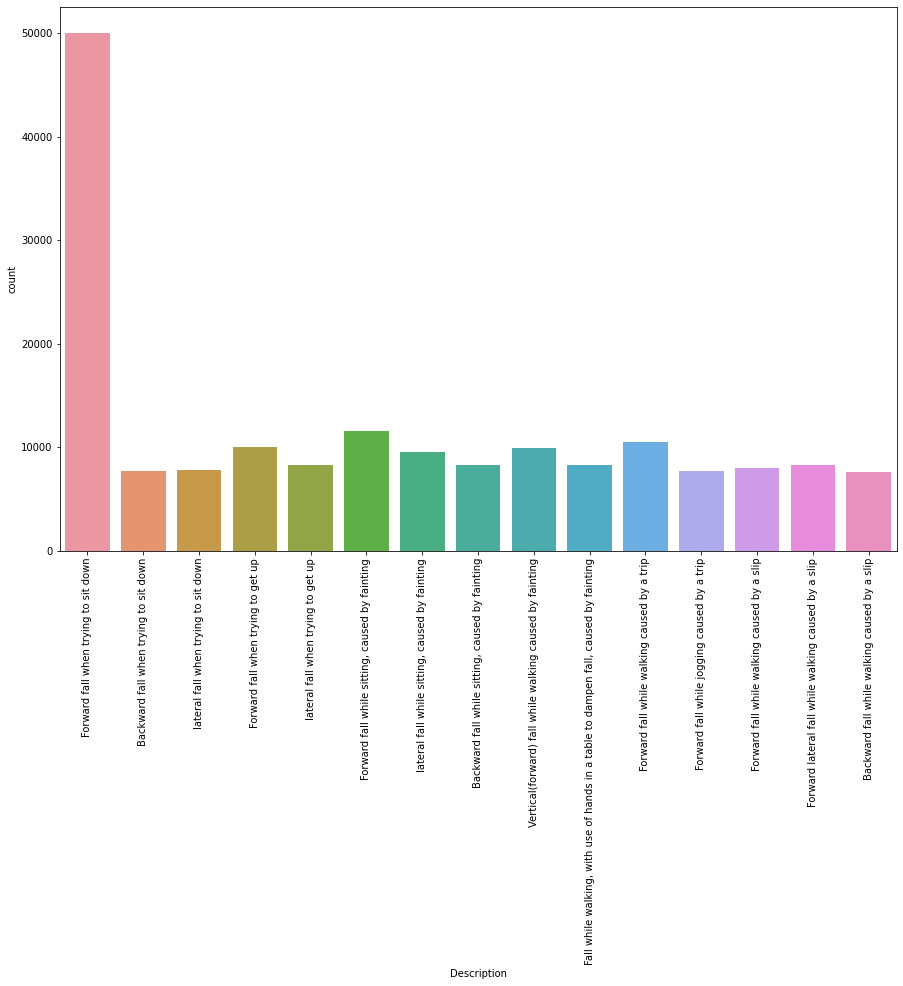

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Description", data=data)
plt.xticks(x = data['Description'],  rotation='vertical')
plt.show()

In [ ]:
data['Task ID'].unique()

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '20', '21', ' '], dtype=object)

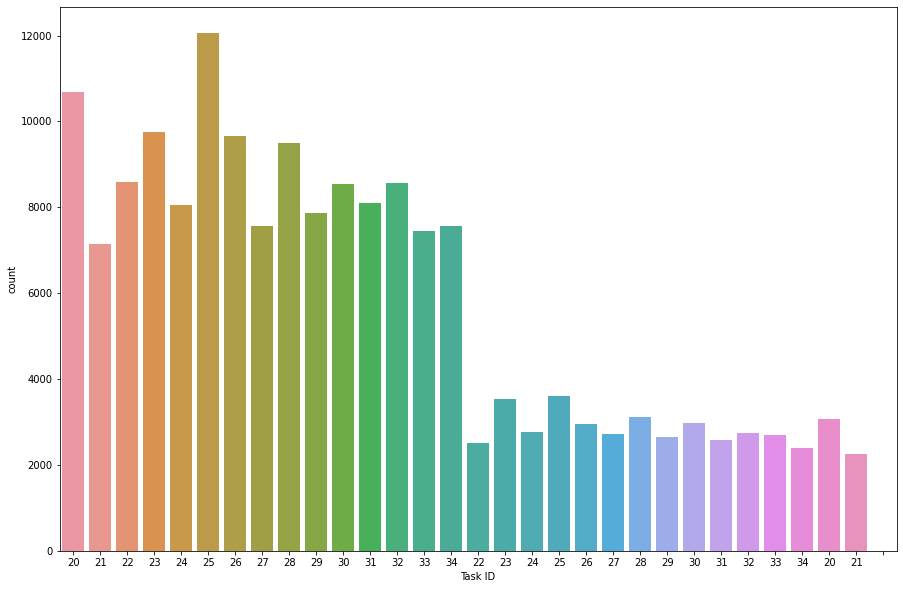

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Task ID", data=data)
plt.xticks(x = data['Task ID'],  rotation='horizontal')
plt.show()

In [ ]:
X = pd.DataFrame(data.drop(['Description','Task ID','Trial ID','Subject'],axis=1))
Y = data.Description.values.astype(object)

((173648, 9), (173648,))

In [ ]:
Y

array(['Forward fall when trying to sit down',
       'Forward fall when trying to sit down',
       'Forward fall when trying to sit down', ...,
       'Backward fall while walking caused by a slip',
       'Backward fall while walking caused by a slip',
       'Backward fall while walking caused by a slip'], dtype=object)

In [ ]:
X.head()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,EulerX,EulerY,EulerZ
0,-0.043,-0.729,-0.159,25.439335,0.401071,-0.802141,19.033665,-12.163898,51.995939
1,-0.043,-0.719,-0.142,27.731167,0.171887,-1.718874,19.314414,-12.152439,51.978750
2,-0.042,-0.709,-0.136,29.965703,2.750198,-2.005353,19.623811,-12.118062,51.967291
3,-0.049,-0.711,-0.157,31.971056,2.750198,-0.974029,19.944668,-12.083684,51.967291
4,-0.062,-0.726,-0.151,33.575339,2.005353,0.401071,20.282713,-12.060766,51.978750


In [ ]:
Y[1]

'Forward fall when trying to sit down'

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173648 entries, 0 to 173647
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AccX    173648 non-null  float64
 1   AccY    173648 non-null  float64
 2   AccZ    173648 non-null  float64
 3   GyrX    173648 non-null  float64
 4   GyrY    173648 non-null  float64
 5   GyrZ    173648 non-null  float64
 6   EulerX  173648 non-null  float64
 7   EulerY  173648 non-null  float64
 8   EulerZ  173648 non-null  float64
dtypes: float64(9)
memory usage: 11.9 MB


In [ ]:
#Total Number of Continous and Categorical features in the training set
num_cols = X._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 9


In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [ ]:
# encoding train labels 
encoder.fit(Y)
y = encoder.transform(Y)
y.shape

(173648,)

In [ ]:
Y[1]

'Forward fall when trying to sit down'

In [ ]:
np.array(Y)

array(['Forward fall when trying to sit down',
       'Forward fall when trying to sit down',
       'Forward fall when trying to sit down', ...,
       'Backward fall while walking caused by a slip',
       'Backward fall while walking caused by a slip',
       'Backward fall while walking caused by a slip'], dtype=object)

In [ ]:
labels = encoder.classes_

In [ ]:
labels 

array(['Backward fall when trying to sit down',
       'Backward fall while sitting, caused by fainting',
       'Backward fall while walking caused by a slip',
       'Fall while walking, with use of hands in a table to dampen fall, caused by fainting',
       'Forward fall when trying to get up',
       'Forward fall when trying to sit down',
       'Forward fall while jogging caused by a trip',
       'Forward fall while sitting, caused by fainting',
       'Forward fall while walking caused by a slip',
       'Forward fall while walking caused by a trip',
       'Forward lateral fall while walking caused by a slip',
       'Vertical(forward) fall while walking caused by fainting',
       'lateral fall when trying to get up',
       'lateral fall when trying to sit down',
       'lateral fall while sitting, caused by fainting'], dtype=object)

In [ ]:
# Scaling the feature 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
X[1]

array([-0.13472704, -0.26189998,  0.13339312,  0.4897733 , -0.06598128,
        0.068309  , -1.12914568, -0.8476369 ,  1.7665782 ])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((121553, 9), (52095, 9), (121553,), (52095,))

In [ ]:
X_train

array([[ 3.83387971e+00, -1.28633918e+00,  9.23946342e-01, ...,
         8.04179632e-01,  2.21266718e+00,  1.76052263e+00],
       [ 1.53218471e+00,  2.61181724e+00, -1.12273759e+00, ...,
        -1.35839800e+00,  1.09952479e-01,  2.68219536e-01],
       [-1.76722875e-01,  5.45754678e-01,  4.14596614e-01, ...,
         1.17831203e+00, -5.57983772e-01, -1.99959145e+00],
       ...,
       [ 2.96537921e-01,  4.92880396e-01,  5.20711141e-01, ...,
        -2.52628915e-01,  3.94788755e-01,  1.83836484e-01],
       [-1.10498669e-01,  2.28508987e-01, -6.79709442e-01, ...,
        -1.43999889e+00, -2.44246408e-01,  7.10185806e-02],
       [-3.94287879e-02,  3.79329003e-03,  2.18284740e-01, ...,
         1.54759694e-01, -2.35338357e+00, -2.67435129e-01]])

In [ ]:
X_test

array([[ 0.25777253,  2.85107336, -1.17181556, ..., -3.78055885,
         0.66999134, -1.41496566],
       [-0.47715464, -0.34385511,  0.15594246, ...,  0.02604583,
         0.56723191,  1.15628205],
       [-0.33824533,  0.36466026, -0.15178967, ...,  0.03205043,
         0.69600231,  1.32307351],
       ...,
       [-0.05073536, -0.36236111,  1.07648597, ...,  1.8049453 ,
        -0.04033318,  0.27559153],
       [ 0.01548885, -0.39540754,  0.54326048, ...,  1.46129777,
        -0.10327332,  0.425796  ],
       [ 0.65996345, -0.26850926,  0.41857591, ..., -0.87464327,
         0.3373077 ,  0.30494788]])

In [ ]:
y_train

array([13,  6,  3, ...,  6,  5, 14])

In [ ]:
y_test

array([ 9,  5, 12, ...,  1,  1,  4])

In [ ]:
from sklearn.model_selection import train_test_split
# Classifiier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.34429407812649965

In [ ]:
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred)
print(confusion_matrix_lr)

Accuracy of logistic regression classifier on test set: 0.34
[[  500   109    39    25     0  1637     0     4     0     0     1     1
      0     0     0]
 [   45  1753    76    10     0   433     0    63     0     1     0    11
      0     0    89]
 [   84   266   898    67     0   878     0     0     0     2    17    24
      1     1    17]
 [   27    20     0  1683     0   651     1     0     0     0     2     1
      0    10     0]
 [   13     0     0     0     0  2888    29    35     1    67     0     2
      0     0     0]
 [  223   715   351   720     1 11852   128   174    44   262    73   124
      0   309    30]
 [    8     4     4     0     0  1802   125    60     7   158     4   141
      0     1     9]
 [   50     0     0     0     0  3394     3    72     3     9     0     1
      0     2     0]
 [   11     0     0     0     2  2162    51    33    12    68     2    32
      0     4     0]
 [   11     8     0     0     0  2700    76    88    19   175     6   118
      0   

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("Training set score for LR: %f" % lr.score(X_train , y_train))
print("Testing set score for LR: %f" % lr.score(X_test  , y_test ))

              precision    recall  f1-score   support

           0       0.49      0.22      0.30      2316
           1       0.57      0.71      0.63      2481
           2       0.60      0.40      0.48      2255
           3       0.59      0.70      0.64      2395
           4       0.00      0.00      0.00      3035
           5       0.31      0.79      0.44     15006
           6       0.25      0.05      0.09      2323
           7       0.12      0.02      0.03      3534
           8       0.13      0.01      0.01      2377
           9       0.18      0.05      0.08      3209
          10       0.32      0.04      0.07      2475
          11       0.15      0.03      0.05      2996
          12       0.43      0.00      0.01      2473
          13       0.25      0.11      0.15      2325
          14       0.58      0.15      0.24      2895

    accuracy                           0.34     52095
   macro avg       0.33      0.22      0.21     52095
weighted avg       0.31   

In [ ]:
df_cnf_matrix = pd.DataFrame(confusion_matrix_lr, index = labels, columns = labels)

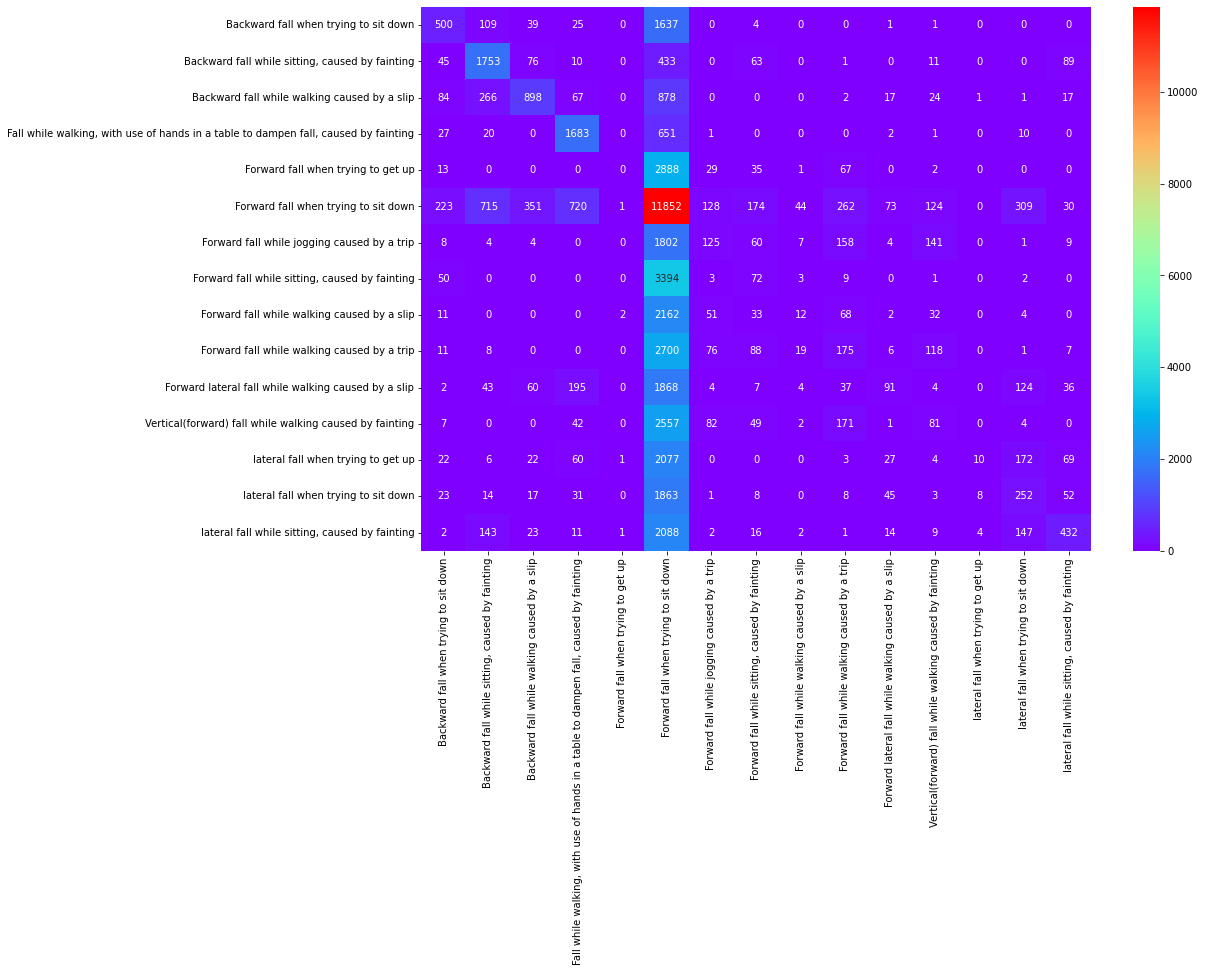

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cnf_matrix, annot=True, fmt='d',  cmap=plt.cm.rainbow)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7789039255206833

In [ ]:
ydtc_pred = dtc.predict(X_test)
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix_dtc = confusion_matrix(y_test, ydtc_pred)
print(confusion_matrix_dtc)

Accuracy of Decision tree classifier on test set: 0.78
[[ 1986    33    25     4    20   157    18    11    11    15     1    14
     12     7     2]
 [   25  2244    37     3     2   108     5     2     2     5     0    14
      2    10    22]
 [   23    37  1874     8     3   218    19     1     5    18    19     9
      9     7     5]
 [    4     2     3  2199     0   106     0     0     1     4    26     2
     28     9    11]
 [   15     2     1     0  2243   381    56   115    66    47    14    69
     10     9     7]
 [  119   127   176   112   349 12013   291   343   329   328   214   321
    112   122    50]
 [   18     8    30     0    67   293  1297    52   115   258    30   121
     17    16     1]
 [    8     1     0     5   111   315    44  2862    70    50     8    45
      9     1     5]
 [   12     2     1     4    74   327   100    78  1437   165    44    90
     20    15     8]
 [   18    10    14     6    78   406   226    53   153  1975    49   185
     12    13   

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ydtc_pred))
print("Training set score for DT: %f" % dtc.score(X_train , y_train))
print("Testing set score for DT: %f" % dtc.score(X_test  , y_test ))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2316
           1       0.89      0.90      0.90      2481
           2       0.85      0.83      0.84      2255
           3       0.91      0.92      0.92      2395
           4       0.73      0.74      0.74      3035
           5       0.80      0.80      0.80     15006
           6       0.58      0.56      0.57      2323
           7       0.80      0.81      0.80      3534
           8       0.61      0.60      0.61      2377
           9       0.64      0.62      0.63      3209
          10       0.77      0.76      0.76      2475
          11       0.70      0.71      0.70      2996
          12       0.79      0.81      0.80      2473
          13       0.77      0.79      0.78      2325
          14       0.90      0.90      0.90      2895

    accuracy                           0.78     52095
   macro avg       0.77      0.77      0.77     52095
weighted avg       0.78   

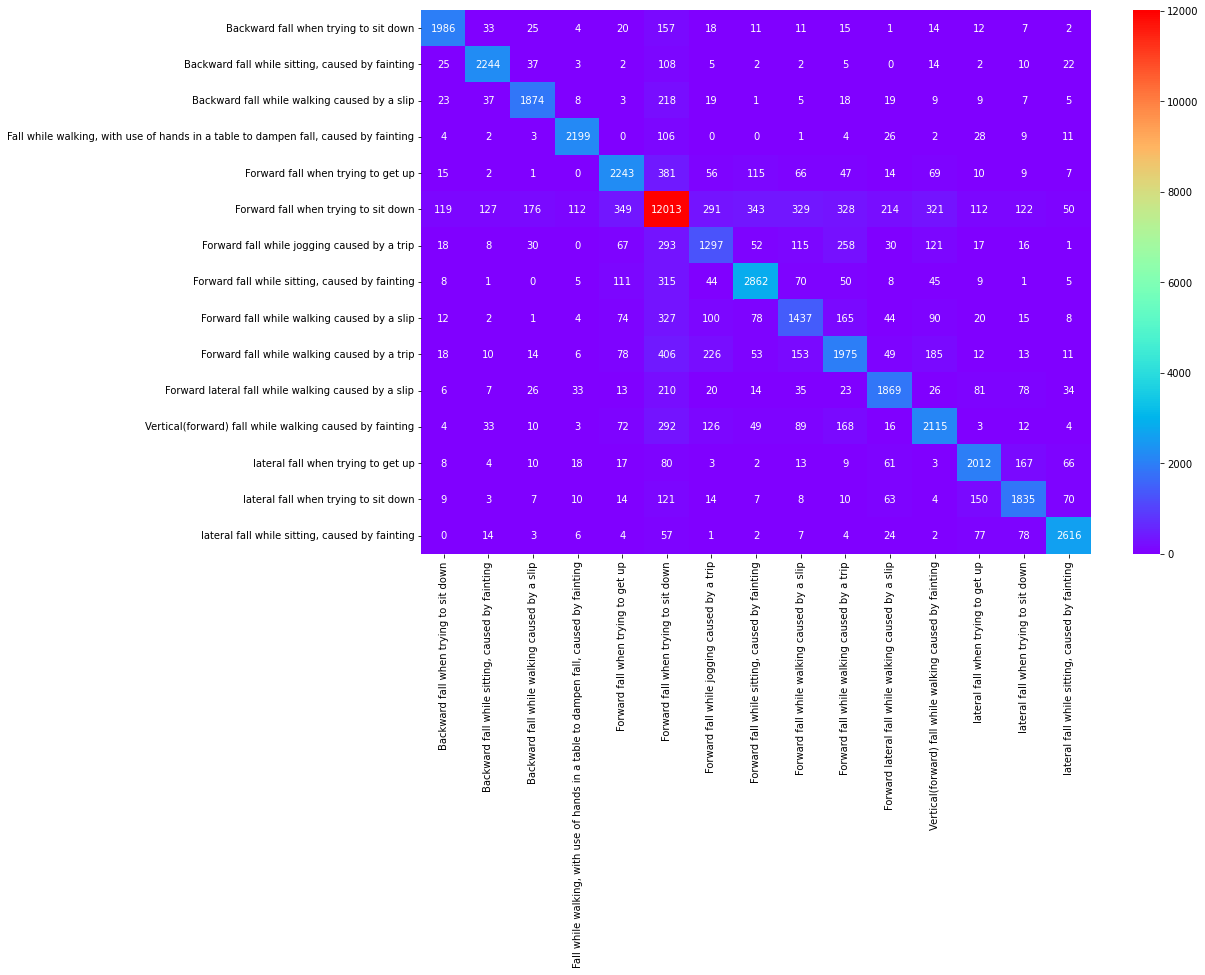

In [ ]:
df_cnf_matrix = pd.DataFrame(confusion_matrix_dtc, index = labels, columns = labels)
plt.figure(figsize=(15,10))
sns.heatmap(df_cnf_matrix, annot=True, fmt='d',  cmap=plt.cm.rainbow)

In [ ]:
rfc = RandomForestClassifier(
    n_estimators = 100,
    #min_samples_leaf=10,
    #min_samples_split=10
)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9114310394471639

In [ ]:
yrfc_pred = rfc.predict(X_test)
print('Accuracy of Random forest tree classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix_rfc = confusion_matrix(y_test, yrfc_pred)
print(confusion_matrix_rfc)

Accuracy of Random forest tree classifier on test set: 0.91
[[ 2239    14     7     4     0    34     1     6     1     0     0     7
      3     0     0]
 [   16  2397    11     2     0    27     1     0     0     0     0    16
      0     0    11]
 [   19    21  2160     1     0    32     9     0     2     3     4     1
      0     0     3]
 [    0     0     0  2350     0    34     2     0     0     0     4     0
      1     2     2]
 [    6     0     0     0  2569   357     8    43     9    13     1    24
      1     3     1]
 [   78    61   119    43    24 14239    55   101    30   104    61    59
     12     5    15]
 [    8     0    10     0     6   348  1721    18    36   124     7    40
      2     1     2]
 [    3     0     0     0     7   203     6  3292     6     7     0    10
      0     0     0]
 [    7     0     0     1     8   307    38    21  1862    75    16    37
      2     1     2]
 [    7     1     3     0     6   378    63    25    42  2578     7    92
      0    

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yrfc_pred))
print("Training set score for RFT: %f" % rfc.score(X_train , y_train))
print("Testing set score for RFT: %f" % rfc.score(X_test  , y_test ))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2316
           1       0.95      0.97      0.96      2481
           2       0.92      0.96      0.94      2255
           3       0.97      0.98      0.97      2395
           4       0.97      0.85      0.91      3035
           5       0.87      0.95      0.91     15006
           6       0.88      0.74      0.81      2323
           7       0.93      0.93      0.93      3534
           8       0.92      0.78      0.85      2377
           9       0.87      0.80      0.83      3209
          10       0.93      0.91      0.92      2475
          11       0.90      0.85      0.87      2996
          12       0.95      0.93      0.94      2473
          13       0.95      0.93      0.94      2325
          14       0.96      0.98      0.97      2895

    accuracy                           0.91     52095
   macro avg       0.93      0.90      0.91     52095
weighted avg       0.91   

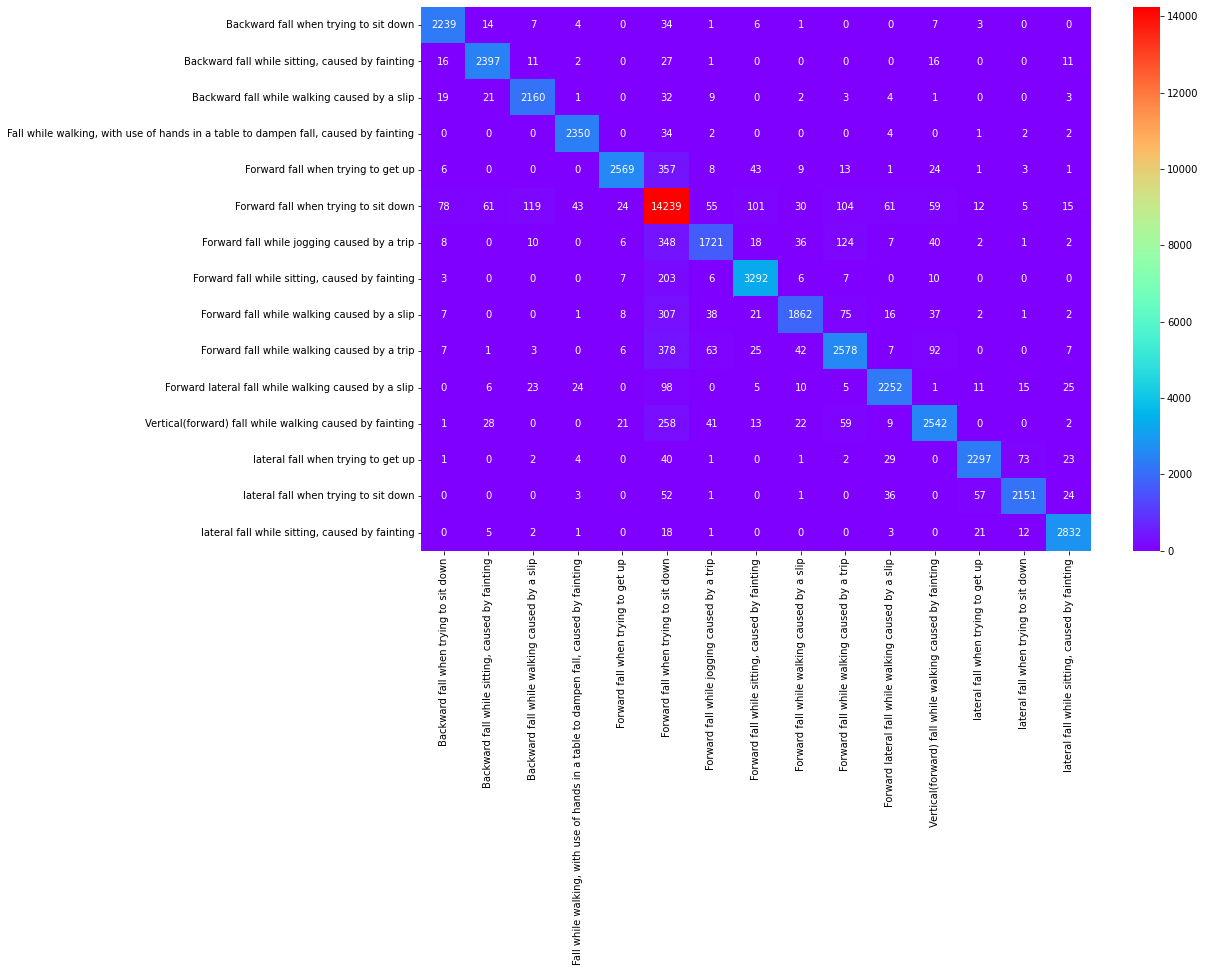

In [ ]:
df_cnf_matrix = pd.DataFrame(confusion_matrix_rfc, index = labels, columns = labels)
oplt.figure(figsize=(15,10))
sns.heatmap(df_cnf_matrix, annot=True, fmt='d',  cmap=plt.cm.rainbow)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8582781456953642

In [ ]:
yknn_pred = knn.predict(X_test)
print('Accuracy of KNN on test set: {:.2f}'.format(knn.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix_knn = confusion_matrix(y_test, yknn_pred)
print(confusion_matrix_knn)

Accuracy of KNN on test set: 0.86
[[ 2225    17     4     3     0    43     2     4     1     2     0     7
      6     1     1]
 [   31  2378     6     0     0    50     0     0     0     0     0    12
      1     0     3]
 [   56    62  1888     6     3   163    25     1     6    14    10     7
      4     1     9]
 [    4     0     4  2332     0    40     0     0     0     0     4     1
      4     4     2]
 [    9     0     0     1  2535   305    19    64    15    23     7    53
      1     2     1]
 [  126    80   150    69   298 13357   142   169    95   171    73   164
     47    28    37]
 [   17     5    11     1    64   401  1425    25    82   188    16    78
      7     2     1]
 [    3     0     0     1    66   294    23  3103    14    11     1    15
      0     0     3]
 [   12     2     1     3    60   321    98    55  1636   106    23    47
      7     2     4]
 [   13     2    10     2    80   393   189    32    90  2252    16   124
      1     2     3]
 [    1     8   

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yknn_pred))
print("Training set score for KNN: %f" % knn.score(X_train , y_train))
print("Testing set score for KNN: %f" % knn.score(X_test  , y_test ))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2316
           1       0.92      0.96      0.94      2481
           2       0.90      0.84      0.87      2255
           3       0.94      0.97      0.96      2395
           4       0.79      0.84      0.81      3035
           5       0.84      0.89      0.86     15006
           6       0.71      0.61      0.66      2323
           7       0.89      0.88      0.88      3534
           8       0.81      0.69      0.74      2377
           9       0.78      0.70      0.74      3209
          10       0.90      0.87      0.89      2475
          11       0.82      0.77      0.79      2996
          12       0.90      0.91      0.91      2473
          13       0.92      0.90      0.91      2325
          14       0.95      0.96      0.96      2895

    accuracy                           0.86     52095
   macro avg       0.86      0.85      0.86     52095
weighted avg       0.86   

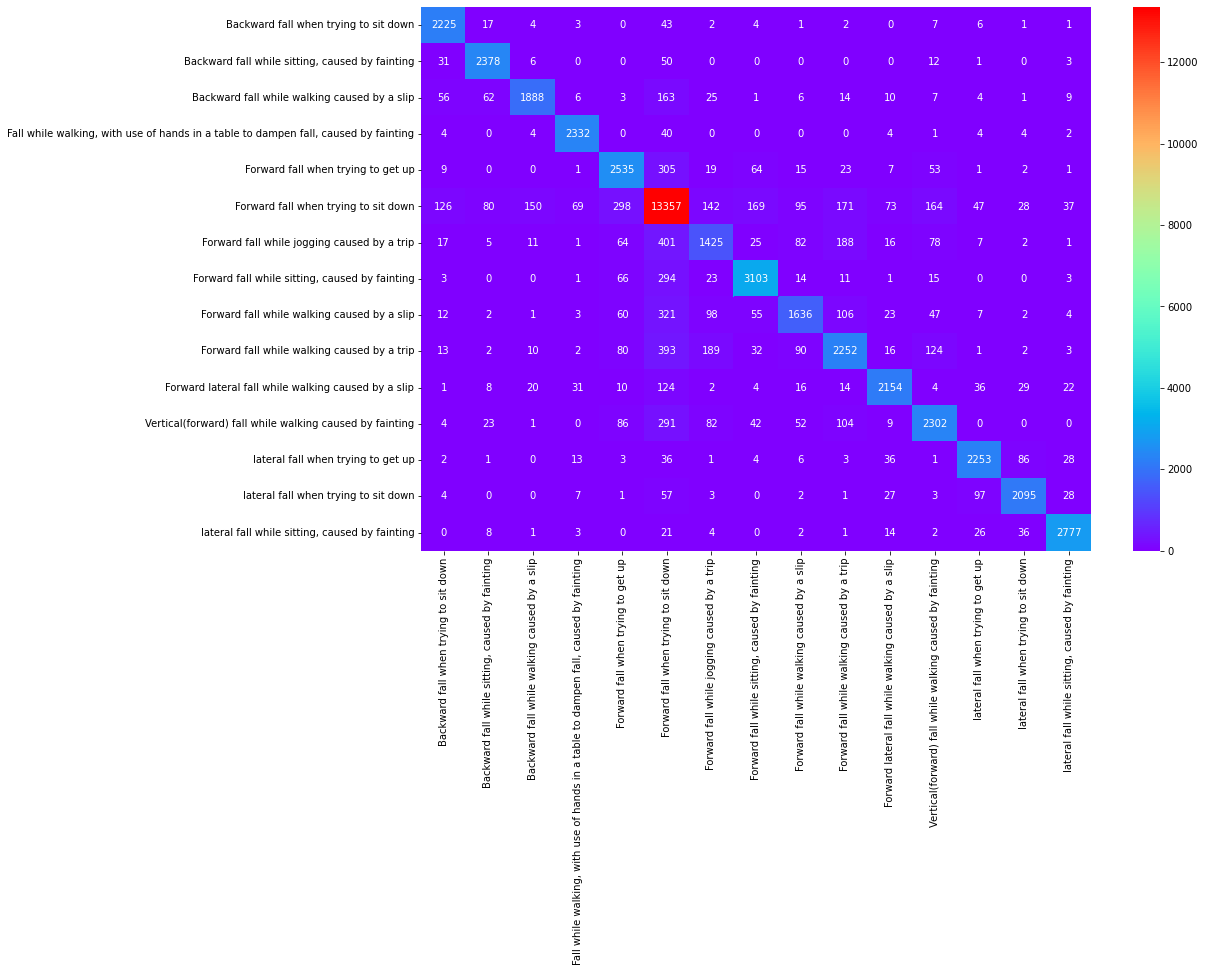

In [ ]:
df_cnf_matrix = pd.DataFrame(confusion_matrix_knn, index = labels, columns = labels)
plt.figure(figsize=(15,10))
sns.heatmap(df_cnf_matrix, annot=True, fmt='d',  cmap=plt.cm.rainbow)

In [ ]:
svc = SVC(gamma='auto')
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.5589595930511565

In [ ]:
print('Accuracy of SVM on test set: {:.2f}'.format(svc.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(y_test, predictions)
print(confusion_matrix_svm)

Accuracy of SVM on test set: 0.56
[[ 1804    67    42    24     0   307     0    11     0     1     0    22
     15     1    22]
 [   86  1993    17    13     0   229     0     0     0     0     0    27
      1     0   115]
 [   56    84  1715     8     0   318    17     0     0    12    16    16
      3     3     7]
 [   14     0    15  1992     0   273     2     5     0     6    29     8
     30    17     4]
 [   36     0     3     4    40  2639     8   137    31    11    10    98
     11     6     1]
 [  427   620   422   291    14 11393    83   505    78   202   294   438
     77    66    96]
 [   32     6    23     0     5  1248   487    23    60   250    15   165
      3     5     1]
 [    7     0     0     0     5  2039     7  1301    11     2     0   162
      0     0     0]
 [   18     0     0     2     3  1418    63    79   415   122    51   184
     11     8     3]
 [   25    16    19     1    11  1655   133    24    79   807    39   373
      9     6    12]
 [    4    16   

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
print("Training set score for SVM: %f" % svc.score(X_train , y_train))
print("Testing set score for SVM: %f" % svc.score(X_test  , y_test ))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      2316
           1       0.69      0.80      0.74      2481
           2       0.73      0.76      0.75      2255
           3       0.78      0.83      0.80      2395
           4       0.42      0.01      0.03      3035
           5       0.45      0.76      0.57     15006
           6       0.57      0.21      0.31      2323
           7       0.61      0.37      0.46      3534
           8       0.57      0.17      0.27      2377
           9       0.51      0.25      0.34      3209
          10       0.66      0.53      0.59      2475
          11       0.50      0.53      0.52      2996
          12       0.60      0.43      0.50      2473
          13       0.61      0.42      0.50      2325
          14       0.79      0.78      0.78      2895

    accuracy                           0.56     52095
   macro avg       0.61      0.51      0.53     52095
weighted avg       0.57   

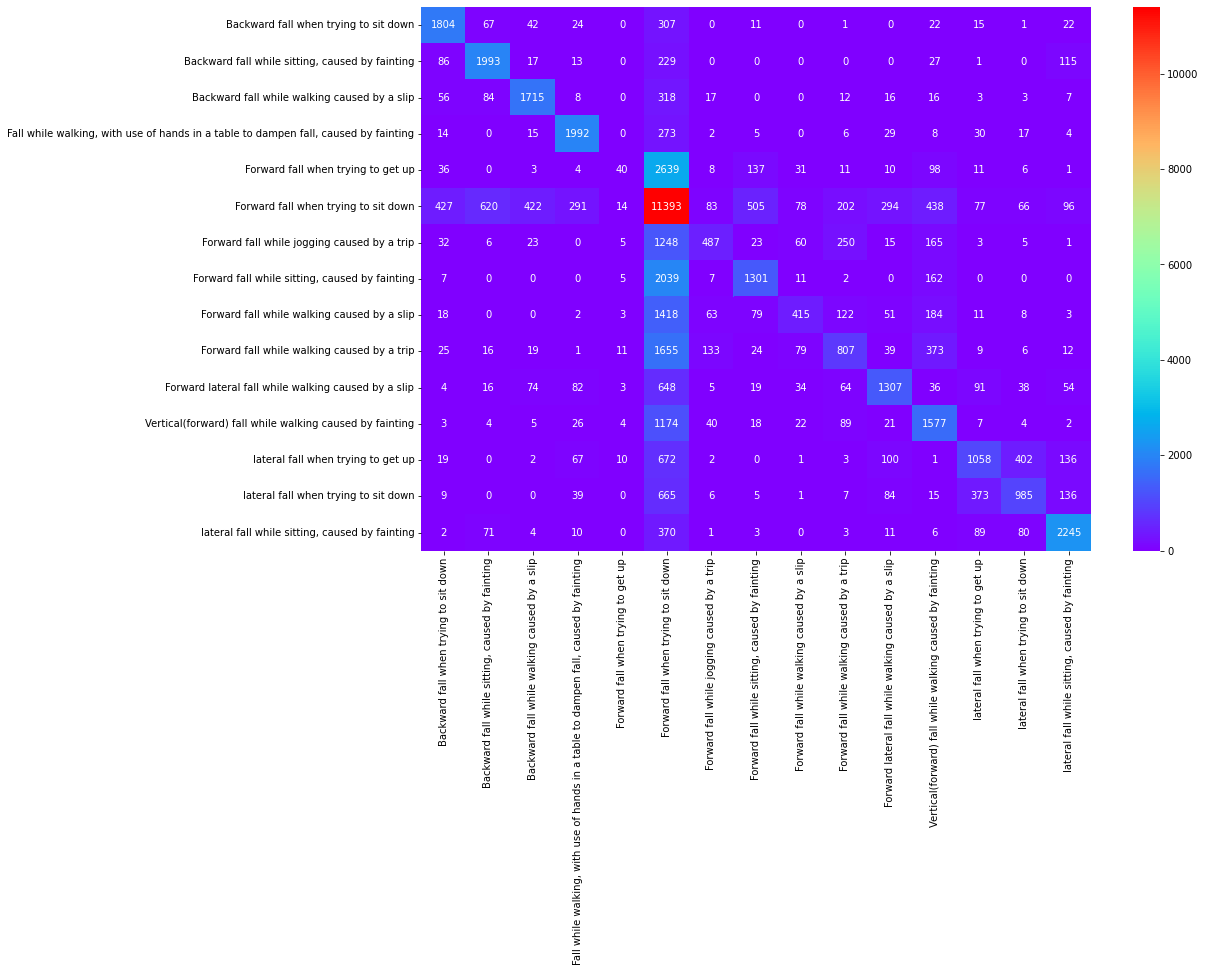

In [ ]:
df_cnf_matrix = pd.DataFrame(confusion_matrix_svm, index = labels, columns = labels)
plt.figure(figsize=(15,10))
sns.heatmap(df_cnf_matrix, annot=True, fmt='d',  cmap=plt.cm.rainbow)